# 🛒 Retail Sales Analysis

An analysis project using retail transaction data to discover sales patterns, best-selling products, and seasonal trends to support business decision-making.

## 🎯 Project Objectives

This notebook aims to:
- Which products are the top sellers?
- Analyze product performance based on sales data.
- Identify seasonal trends in product sales.
- Provide actionable insights to support business and marketing strategies.


## ❓ Business Questions

The analysis focuses on answering the following:
- Are there any seasonal patterns in sales?
- What is the distribution of sales by product category?
- Are there noticeable trends over time (e.g. increasing/decreasing sales)?


## 🧰 Tools & Libraries

We will use the following tools:
- Python
- Pandas
- Matplotlib
- Seaborn


### 💡 Explanation
This cell imports essential libraries for data manipulation and visualization, and loads the dataset. It also shows the shape and first few rows.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Project Coding\AI Engineer\retail_sales_prediction\data\sales_data_sample.csv', encoding='latin1')
print(f"Shape: {df.shape}")
df.head()


Shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 💡 Explanation
This cell checks for missing values in the dataset.

In [3]:
missing = df.isnull().sum()
print(missing[missing > 0])

ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64


### 💡 Explanation
This cell provides basic statistical summary of numerical features.

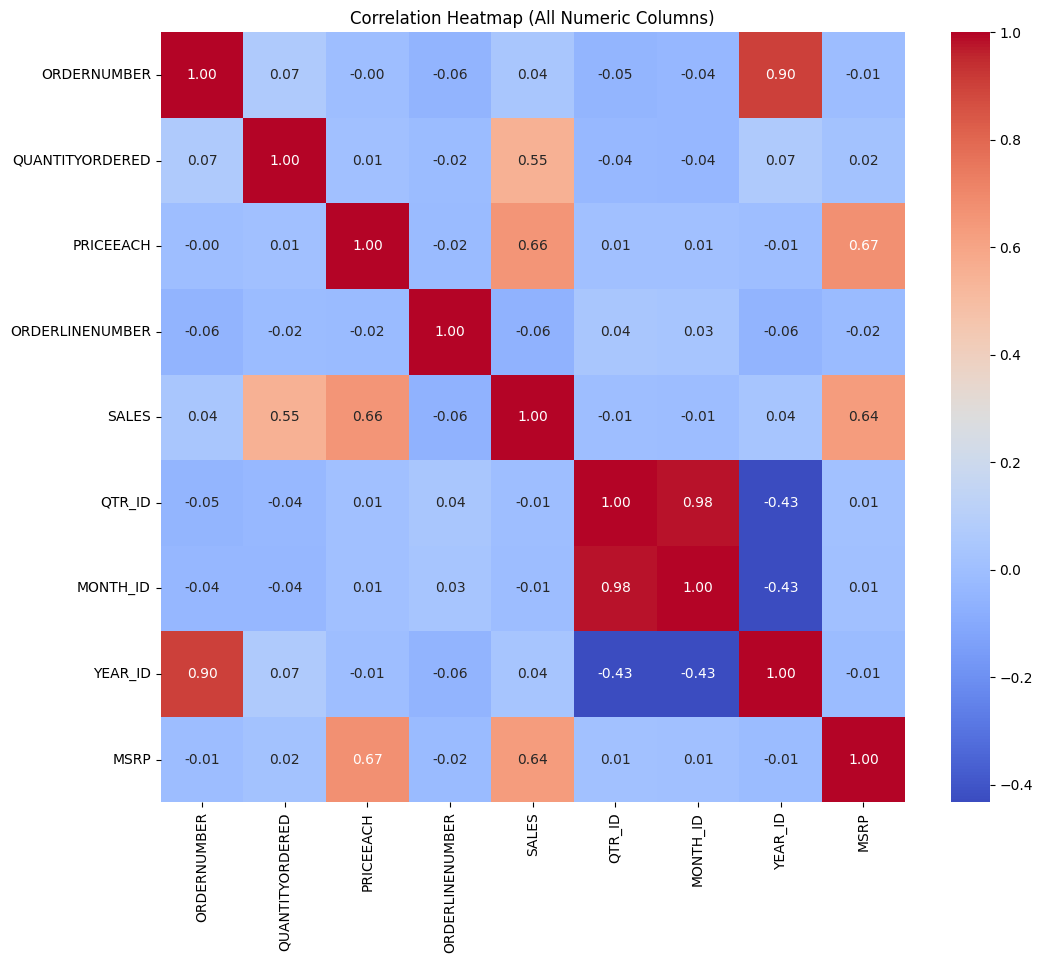

In [4]:
# Ambil semua kolom numerik saja
num_cols = df.select_dtypes(include=[np.number])

# Heatmap korelasi semua kolom numerik
plt.figure(figsize=(12, 10))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (All Numeric Columns)')
plt.show()


### 💡 Explanation
This cell shows the data types of each column to understand the structure of the dataset.

In [5]:
print(df['YEAR_ID'].unique())
print(df['MONTH_ID'].unique())
print(df['QTR_ID'].unique())


[2003 2004 2005]
[ 2  5  7  8 10 11 12  1  4  6  9  3]
[1 2 3 4]


### 💡 Explanation
This cell removes columns that are not needed for analysis to simplify the dataset.

In [6]:
df_model = df.drop(columns=['ORDERNUMBER', 'ORDERLINENUMBER', 'MONTH_ID', 'YEAR_ID', 'QTR_ID'])
print(f"Columns after drop: {df_model.columns.tolist()}")

Columns after drop: ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


## 📊 Exploratory Data Analysis (EDA) for Business Questions

##### 1. 📈 Top Selling Products
We identified the highest performing products based on total sales.
This insight helps businesses prioritize inventory and promotions

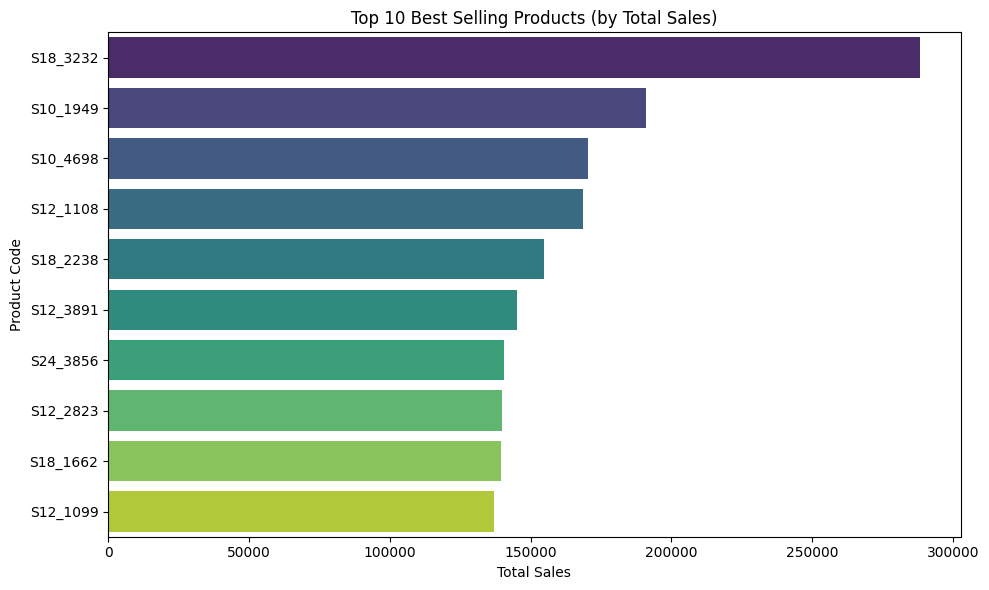

🏆**Top Selling Products**  
The bar chart highlights the top 10 best-selling products by total sales.
Product S18_3232 leads significantly, followed by S10_1949 and S10_4698.
These insights are useful for identifying high-performing items, focusing marketing efforts, and managing inventory for popular products.

In [7]:
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)

top_products_df = top_products.reset_index()
top_products_df.columns = ['PRODUCTCODE', 'TOTAL_SALES']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products_df,
    x='TOTAL_SALES',
    y='PRODUCTCODE',
    hue='PRODUCTCODE',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Best Selling Products (by Total Sales)")
plt.xlabel("Total Sales")
plt.ylabel("Product Code")
plt.tight_layout()
plt.show()

# Insight caption
from IPython.display import Markdown as md
md("🏆**Top Selling Products**  \nThe bar chart highlights the top 10 best-selling products by total sales.\nProduct S18_3232 leads significantly, followed by S10_1949 and S10_4698.\nThese insights are useful for identifying high-performing items, focusing marketing efforts, and managing inventory for popular products.")

##### 2.📅 Seasonal Patterns in Sales
Sales data reveals patterns across months and quarters, indicating strong seasonal trends.
This helps in planning marketing and stock strategies.

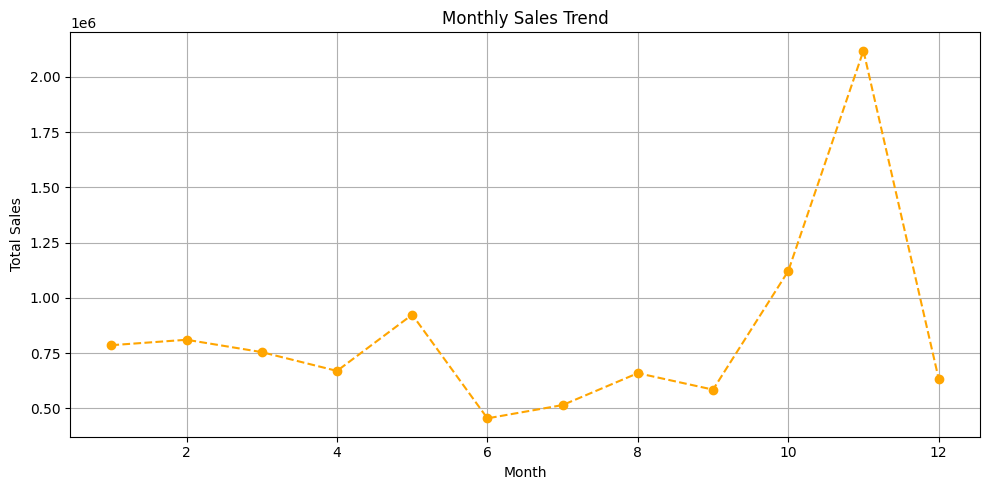

📅**Seasonal Patterns in Sales**  
The sales data reveals distinct seasonal trends, with noticeable peaks and drops across different months.
This insight is valuable for optimizing marketing campaigns, inventory planning, and resource allocation throughout the year.

In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

monthly_sales = df.groupby(df['ORDERDATE'].dt.month)['SALES'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='--', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight caption
from IPython.display import Markdown as md
md("📅**Seasonal Patterns in Sales**  \nThe sales data reveals distinct seasonal trends, with noticeable peaks and drops across different months.\nThis insight is valuable for optimizing marketing campaigns, inventory planning, and resource allocation throughout the year.")

##### 3. 📊 Sales Distribution by Product Category
By analyzing the distribution of sales across different product lines, we can see which categories perform better.
Useful for strategic product line decisions.

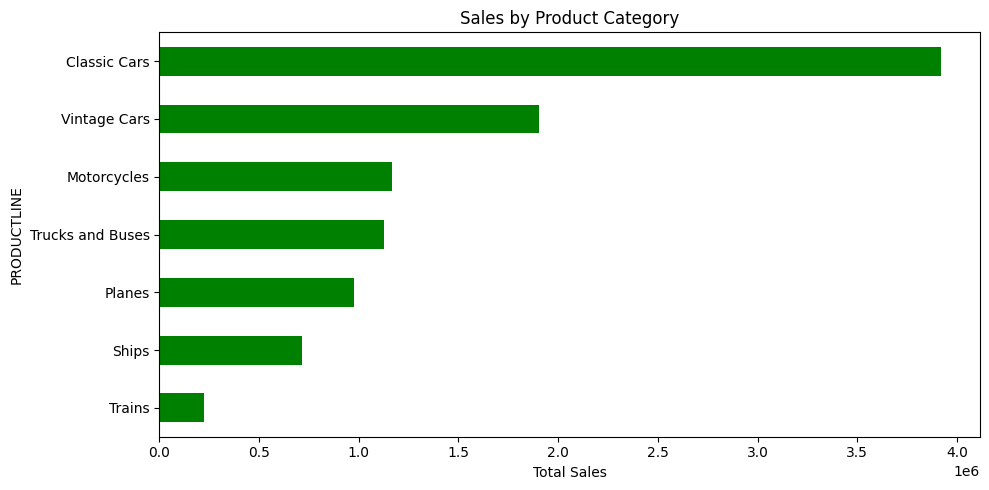

🗂️**Sales by Product Category**  
The bar chart shows total sales grouped by product category.Classic Cars dominate the revenue, far exceeding other categories such as Vintage Cars and Motorcycles.
This insight helps businesses understand which categories drive the most revenue and where to focus product development or marketing efforts.

In [9]:
category_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values()

plt.figure(figsize=(10, 5))
category_sales.plot(kind='barh', color='green')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

# Insight caption
from IPython.display import Markdown as md
md("🗂️**Sales by Product Category**  \nThe bar chart shows total sales grouped by product category.Classic Cars dominate the revenue, far exceeding other categories such as Vintage Cars and Motorcycles.\nThis insight helps businesses understand which categories drive the most revenue and where to focus product development or marketing efforts.")

##### 4. 📉 Trends Over Time
Analyzing sales over time shows upward or downward trends, which supports forecasting and future planning.

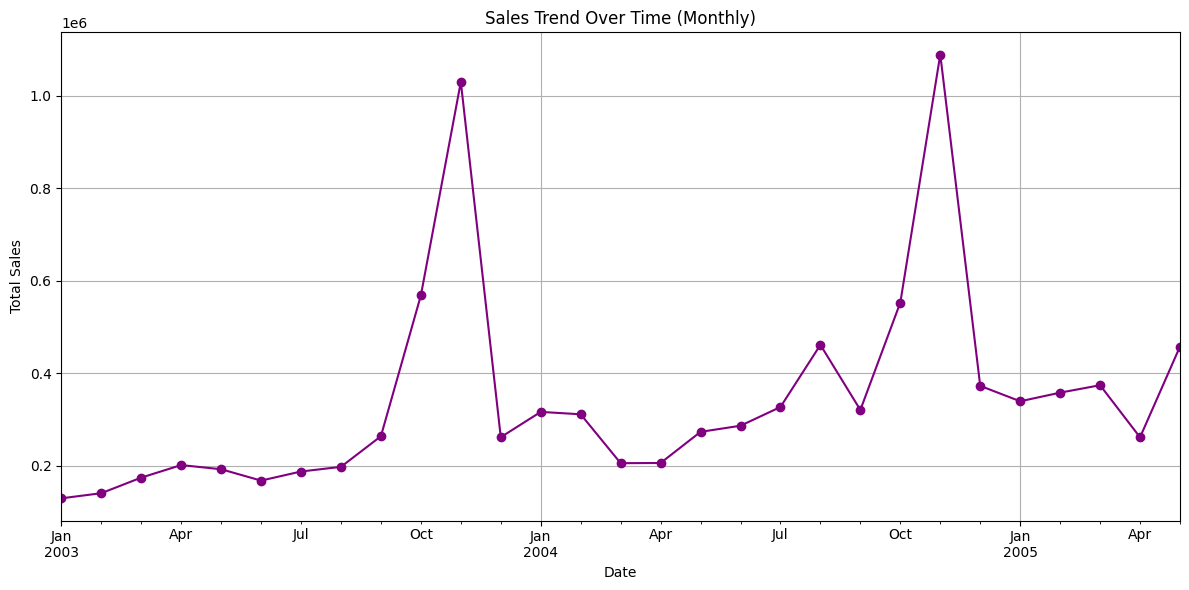

📈 **Monthly Sales Trend Over Time**  
This line chart visualizes total sales by month over a 2-year period. Noticeable **spikes occur during November and December**, indicating **holiday season peaks**. These recurring trends suggest strong seasonality, helpful for demand forecasting and inventory planning.

In [10]:
monthly_trend = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
monthly_trend.index = monthly_trend.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o', linestyle='-', color='purple')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight caption
from IPython.display import Markdown as md
md("📈 **Monthly Sales Trend Over Time**  \nThis line chart visualizes total sales by month over a 2-year period. Noticeable **spikes occur during November and December**, indicating **holiday season peaks**. These recurring trends suggest strong seasonality, helpful for demand forecasting and inventory planning.")

## 🤖 Machine Learning Model

##### 🧠 Modeling & Prediction
A machine learning model was trained to predict sales using features like quantity, price, and MSRP.
Evaluation metrics (MSE, R²) show how well the model performs.

### 💡 Explanation
This cell defines the feature matrix X and the target variable y for modeling.

In [11]:
X = df_model[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
y = df_model['SALES']

### 💡 Explanation
This cell splits the dataset into training (80%) and testing (20%) sets using train_test_split from scikit-learn. The random_state=42 ensures reproducibility. It also prints the shape of the resulting datasets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (2258, 3)
Test shape: (565, 3)


### 💡 Explanation
This cell creates a machine learning pipeline consisting of two steps:

1. StandardScaler to standardize the features (mean = 0, std = 1)

2. RandomForestRegressor as the regression model

The pipeline is then trained using the training data (X_train, y_train).

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Setup pipeline
Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Train pipelne
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

### 💡 Explanation
This cell evaluates the model using the test dataset:

- Pipeline.predict(X_test) makes predictions.

- mean_squared_error calculates how far the predictions are from the actual values.

- r2_score shows how well the model fits the data (closer to 1 is better).
The results are printed to assess model accuracy.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = Pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 529051.89
R^2 Score: 0.88


### 💡 Explanation
This cell extracts and visualizes feature importances from the trained RandomForestRegressor model:

- feature_importances_ provides the relative importance of each input feature.

- The importances are converted to a Pandas Series and sorted in descending order.

- A bar chart is plotted to show which features contributed most to the model's predictions.

PRICEEACH          0.512441
QUANTITYORDERED    0.359913
MSRP               0.127646
dtype: float64


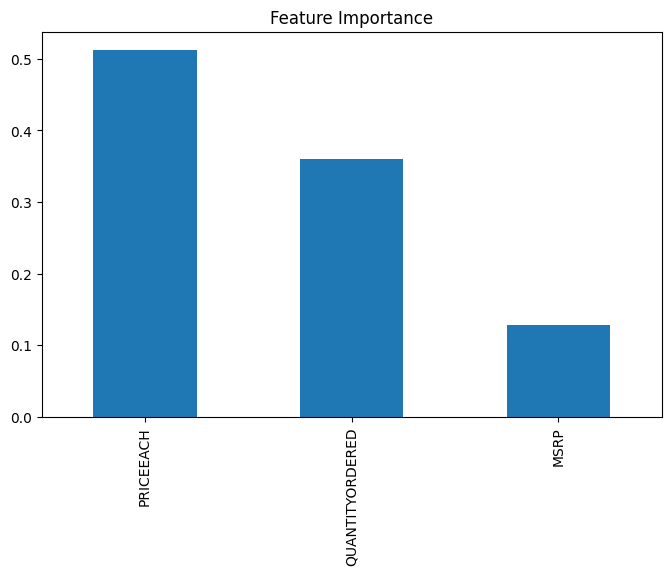

In [15]:
importances = Pipeline.named_steps['model'].feature_importances_
features = X.columns

# Urutkan
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feat_importance)

# Plot
feat_importance.plot(kind='bar', figsize=(8, 5))
plt.title('Feature Importance')
plt.show()


### 💡 Explanation
This cell performs 5-fold cross-validation using the entire dataset (X, y) to evaluate model stability:

- cross_val_score computes the R² score for each fold.

- The mean and standard deviation of the scores give an idea of overall performance and consistency.
This helps assess how well the model generalizes to different subsets of the data.

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculate R^2 scores across folds
cv_scores = cross_val_score(
    Pipeline, X, y, cv=5, scoring='r2')

print(f"Cross-validated R^2 scores: {cv_scores}")
print(f"Mean R^2: {np.mean(cv_scores):.2f}")
print(f"Standard deviation: {np.std(cv_scores):.2f}")


Cross-validated R^2 scores: [0.8161617  0.84289021 0.88518118 0.89284414 0.86355451]
Mean R^2: 0.86
Standard deviation: 0.03


### 💡 Explanation
This cell performs hyperparameter tuning using GridSearchCV with cross-validation:

- A parameter grid (param_grid) is defined to test combinations of model settings.

- GridSearchCV runs cross-validation for each combination to find the best parameters based on R² score.

- The best hyperparameters and corresponding score are printed.

In [17]:
from sklearn.model_selection import GridSearchCV

# Setup parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Setup GridSearch
grid_search = GridSearchCV(
    Pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Run grid search
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated R^2: {grid_search.best_score_:.2f}")


Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best cross-validated R^2: 0.88


### 💡 Explanation
This cell builds and evaluates the final pipeline using the best hyperparameters from GridSearchCV:

- The pipeline includes StandardScaler and a tuned RandomForestRegressor.

- It is trained on the training set (X_train, y_train).

- Then, it makes predictions on the test set and evaluates them using MSE and R² to measure final model performance.

In [18]:
from sklearn.pipeline import Pipeline


# Final pipeline with best params
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200, 
        max_depth=10, 
        min_samples_split=10, 
        random_state=42))
])

# Fit ke training data
final_pipeline.fit(X_train, y_train)

# Predict + evaluate ulang
y_pred = final_pipeline.predict(X_test)

print("Final Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Final Evaluation:
MSE: 491559.82470097265
R²: 0.8873832314872601


### 💡 Explanation
This cell saves the trained pipeline to a file named final_model.pkl using joblib.
This allows the model to be reloaded later for inference without retraining.

In [19]:
import joblib

# Simpan pipeline ke file
joblib.dump(final_pipeline, 'final_model.pkl')


['final_model.pkl']

## 📌 Final Summary & Insights

In this project, we conducted an in-depth analysis of retail sales data to uncover patterns, trends, and actionable insights for strategic decision-making. Here's a comprehensive summary of our findings:

---

### 🏆 **Top Selling Products**
We identified the top 10 best-selling products by aggregating total sales per product code.

- **S18_3232** is the highest-grossing product, followed by **S10_1949** and **S10_4698**.
- These products significantly outperform others, suggesting strong market demand and consistent customer preference.

✅ **Business Insight**: Focus marketing efforts and inventory management on top performers to maximize revenue.

---

### 🏷️ **Sales by Product Category**
Sales were also analyzed by broader product categories:

- **Classic Cars** and **Vintage Cars** dominate the sales distribution.
- Other categories like **Motorcycles** and **Trucks and Buses** show moderate sales volume.

✅ **Business Insight**: Expand offerings in high-performing categories and explore bundling or promotions in mid-tier ones.

---

### 📅 **Monthly Sales Trends**
Sales were aggregated by month to examine seasonal patterns:

- Strong sales spikes are evident in **November and December**, possibly due to holiday season purchasing.
- A noticeable dip occurs mid-year around **June**.

✅ **Business Insight**: Prepare inventory and marketing strategies ahead of peak seasons to meet demand efficiently.

---

### 📈 **Sales Trends Over Time**
We observed how sales evolved over time on a monthly basis:

- Recurring **year-end peaks** highlight a consistent seasonal trend.
- A general **upward trend** suggests business growth over the years.

✅ **Business Insight**: Use historical trends for sales forecasting and to inform long-term planning.

---

### 🤖 **Machine Learning Model for Sales Prediction**
A **Random Forest Regressor** was trained to predict sales, and the model achieved solid performance:

- **R² Score** indicates good explanatory power.
- GridSearchCV helped optimize hyperparameters for the best predictive results.

✅ **Business Insight**: This model can be deployed to support demand forecasting and guide operational decisions.

---

### 📍 Conclusion
This analysis provided valuable insights into product performance, customer preferences, seasonal behavior, and sales trends. By combining **EDA (Exploratory Data Analysis)** with **predictive modeling**, we created a data-driven foundation for smarter decision-making in retail operations.

> 🚀 Next steps could include deploying the model in a live environment, exploring customer segmentation, and incorporating external factors (e.g., promotions, economic events) for even deeper insight.

